# EDA 2: Data visualizations

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)
from scipy.stats import pointbiserialr, f_oneway
from scipy.stats import boxcox

Background Info:
 - [Column Definitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
 - [Column Variables](https://www.kaggle.com/datasets/ahmedmohameddawoud/ames-housing-data)

Tasks:
 - <a href="#y">Y Variance (Histograms with Transformations)</a><br>
 - <a href="#f_var">Feature Variance (Histograms)</a><br>
 - <a href="#corr">Correlation Matrices</a><br>
 - <a href="#sp_corr">Feature / Salesprice Correlations</a><br>

In [94]:
housing_d = pd.read_csv('housing_cleaned.csv', index_col=0)

In [95]:
housing_d = housing_d.convert_dtypes()
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2559 entries, 909176150 to 906223180
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2559 non-null   Int64  
 1   SalePrice      2559 non-null   Int64  
 2   MSSubClass     2559 non-null   Int64  
 3   MSZoning       2559 non-null   string 
 4   LotFrontage    2559 non-null   Int64  
 5   LotArea        2559 non-null   Int64  
 6   Street         2559 non-null   string 
 7   LotShape       2559 non-null   string 
 8   LandContour    2559 non-null   string 
 9   Utilities      2559 non-null   string 
 10  LotConfig      2559 non-null   string 
 11  LandSlope      2559 non-null   string 
 12  Neighborhood   2559 non-null   string 
 13  Condition1     2559 non-null   string 
 14  Condition2     2559 non-null   string 
 15  BldgType       2559 non-null   string 
 16  HouseStyle     2559 non-null   string 
 17  OverallQual    2559 non-null   Int64  
 18  

In [115]:
continuous = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold',]
print(len(continuous))
continuous_wlog = ['SalePrice','GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','YrSold','SalesPrice_log','SalePrice_box']
print(len(continuous_wlog))
categorical = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
              'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
              'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition']
print(len(categorical))

34
36
45


<p><a name="Y"></a></p>

#### Sales Prive Curve

<Axes: title={'center': 'As is'}, ylabel='Frequency'>

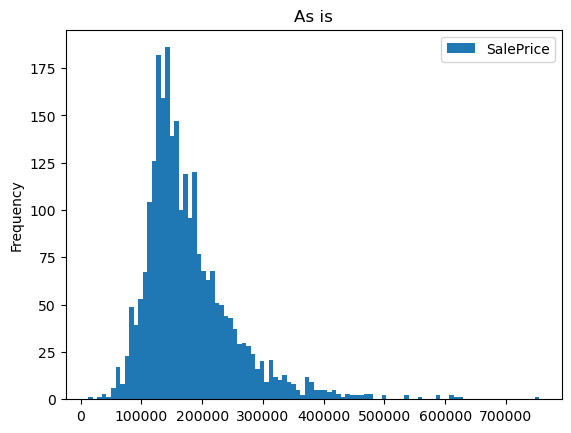

In [97]:
#histogram of Sales Price: looking a bit skewed from normal curve
housing_d[['SalePrice']].plot.hist(bins = 100, title = 'As is') #kind of skewed

<Axes: title={'center': 'Log'}, ylabel='Frequency'>

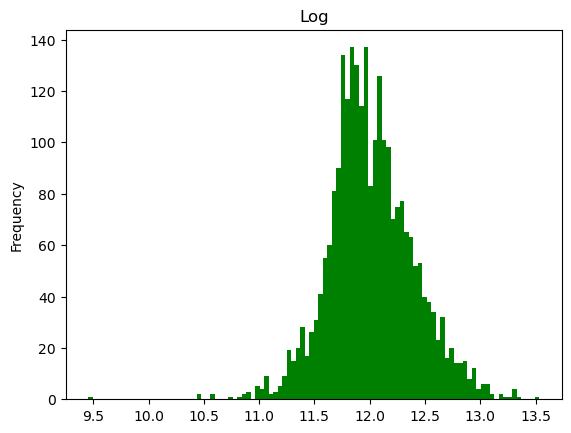

In [98]:
#histogram of Log of Sales Price

housing_d['SalesPrice_log'] = np.log(housing_d['SalePrice'])
housing_d['SalesPrice_log'].plot.hist(bins = 100, title = 'Log', color = 'g')

<Axes: title={'center': 'Log'}, ylabel='Frequency'>

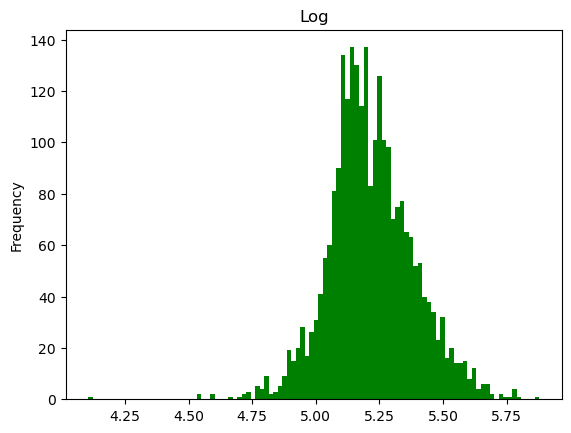

In [138]:
#histogram of Log of Sales Price

housing_d['SalesPrice_log'] = np.log10(housing_d['SalePrice'])
housing_d['SalesPrice_log'].plot.hist(bins = 100, title = 'Log', color = 'g')

Determines the power transformation applied to the data. Optimal lambda: -0.0442290934813688


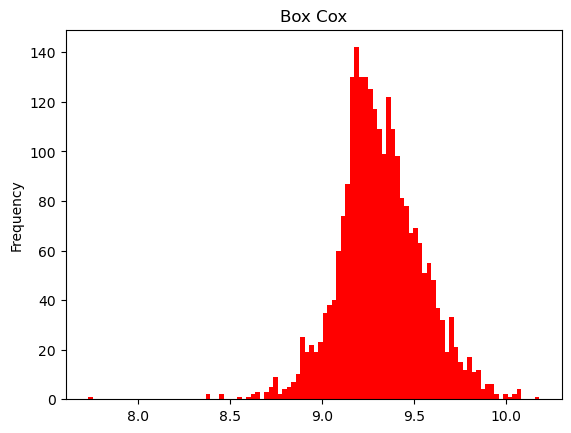

In [99]:
#histogram of Box Cox of Sales Price, lambda = -0.04

housing_d['SalePrice_box'], lambda_value = boxcox(housing_d['SalePrice'])
# plt.figure(figsize=(12, 6))
# plt.hist(housing_d['SalePrice_box'], bins=100, edgecolor='k', alpha=0.7)
housing_d['SalePrice_box'].plot.hist(bins=100, title = 'Box Cox', color = 'r')
# plt.title('Box-Cox Transformed Data Distribution')
# plt.show()
print(f"Determines the power transformation applied to the data. Optimal lambda: {lambda_value}")

<p><a name="f_var"></a></p>

#### Feature Variance

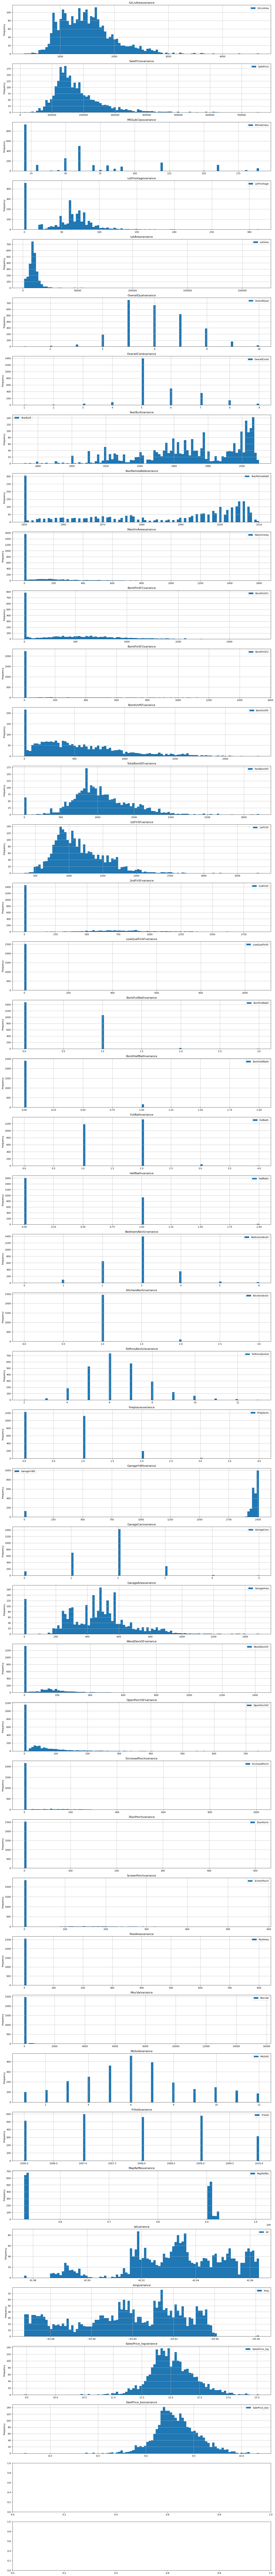

In [100]:
#Continous Variables
fig, axs = plt.subplots(44, 1, figsize=(20, 200))
for num, column in enumerate(housing_d.select_dtypes(include=['int','float']).columns):
    housing_d[[column]].plot.hist(bins=100, ax = axs[num])
    axs[num].set_title(column + 'variance')
    axs[num].grid(True)
plt.show()

<p><a name="corr"></a></p>

#### Correlations

In [116]:
#select int/float
housing_d['SalePrice_2'] = housing_d['SalePrice']
corr_matrix = housing_d[continuous_wlog].corr()

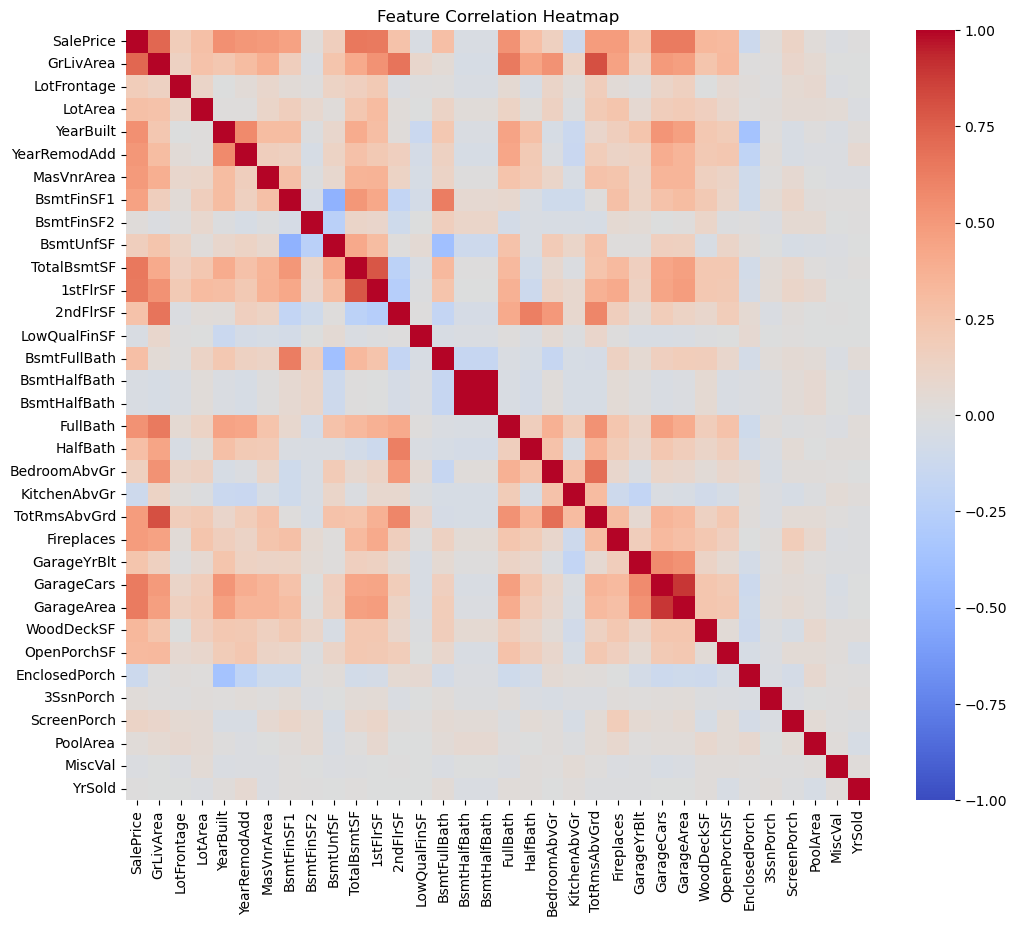

In [117]:
#correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix1, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

SalePrice         12.775719
SalesPrice_log    13.067991
SalePrice_box     13.042740
dtype: float64

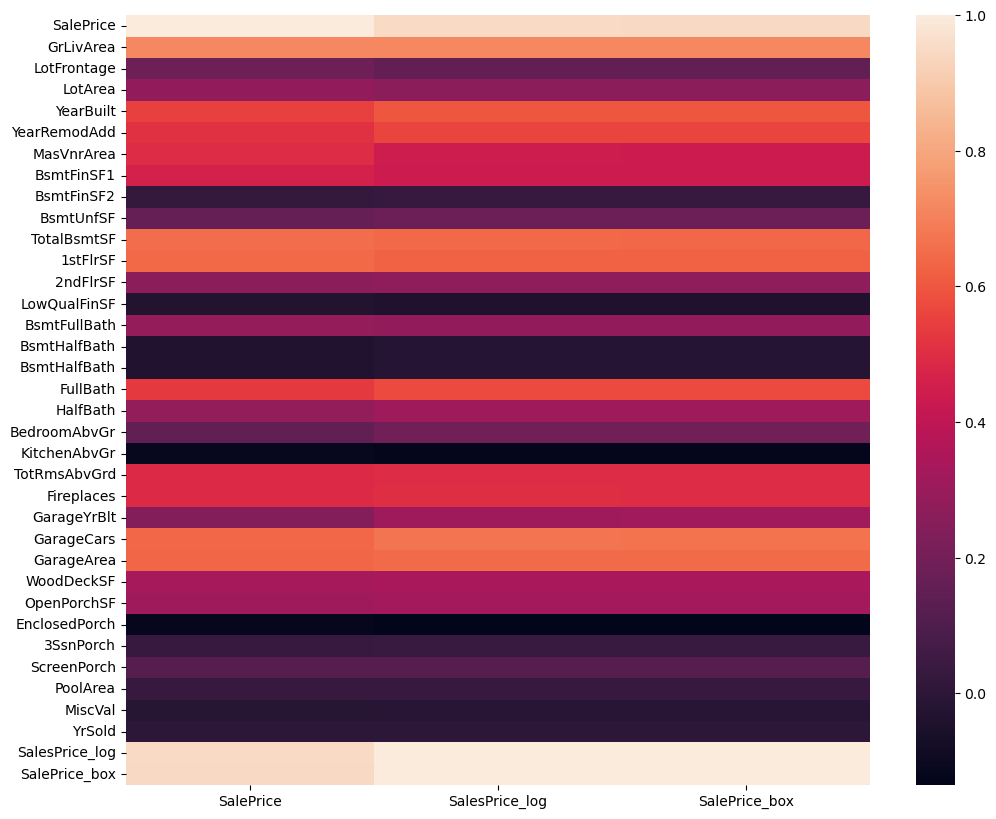

In [118]:
#Comparing corr of all the Salesprice options: 1. No change, 2. Log, 3. Box cox. No huge difference. 

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['SalePrice','SalesPrice_log','SalePrice_box']])
abs(corr_matrix[['SalePrice','SalesPrice_log','SalePrice_box']]).sum() #Log has the highest corr sum

Text(0.5, 1.0, 'Abs Values Feature Correlation Heatmap')

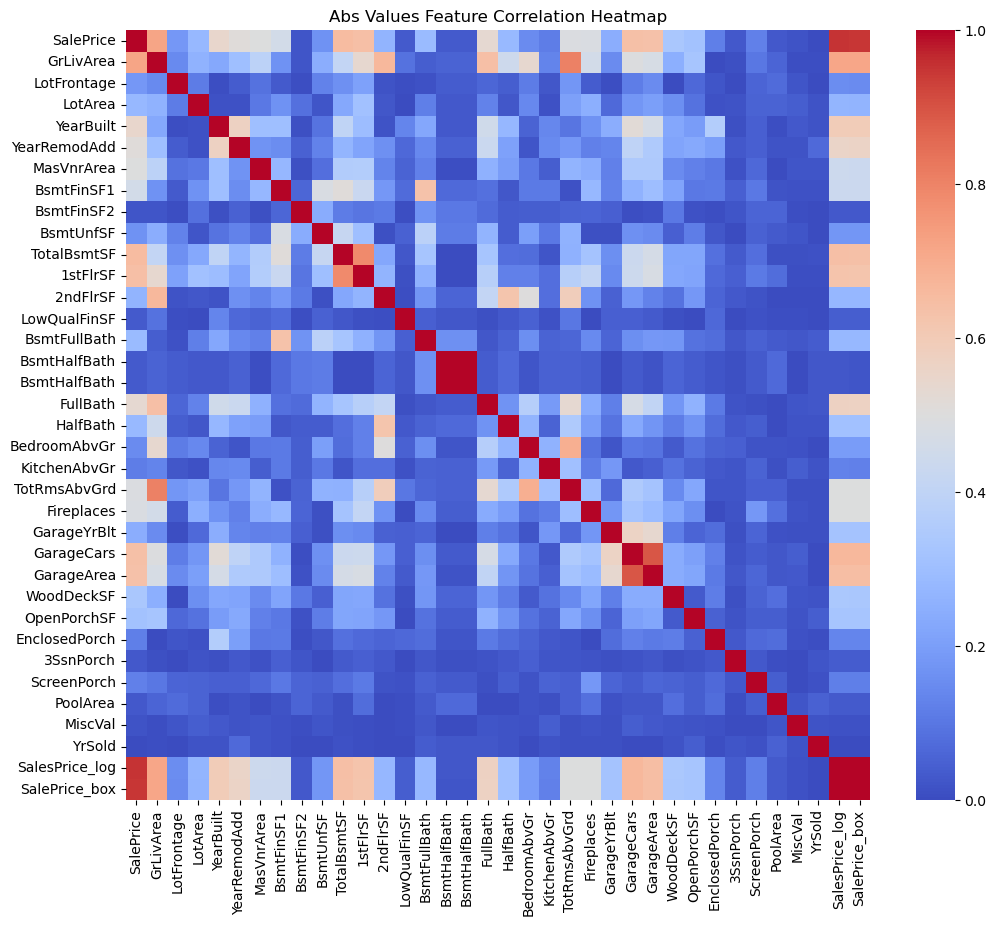

In [119]:
#absolute values correlation

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), cmap='coolwarm', vmin=0, vmax=1)
plt.title('Abs Values Feature Correlation Heatmap')

Text(0.5, 1.0, 'Corr Threshold Map')

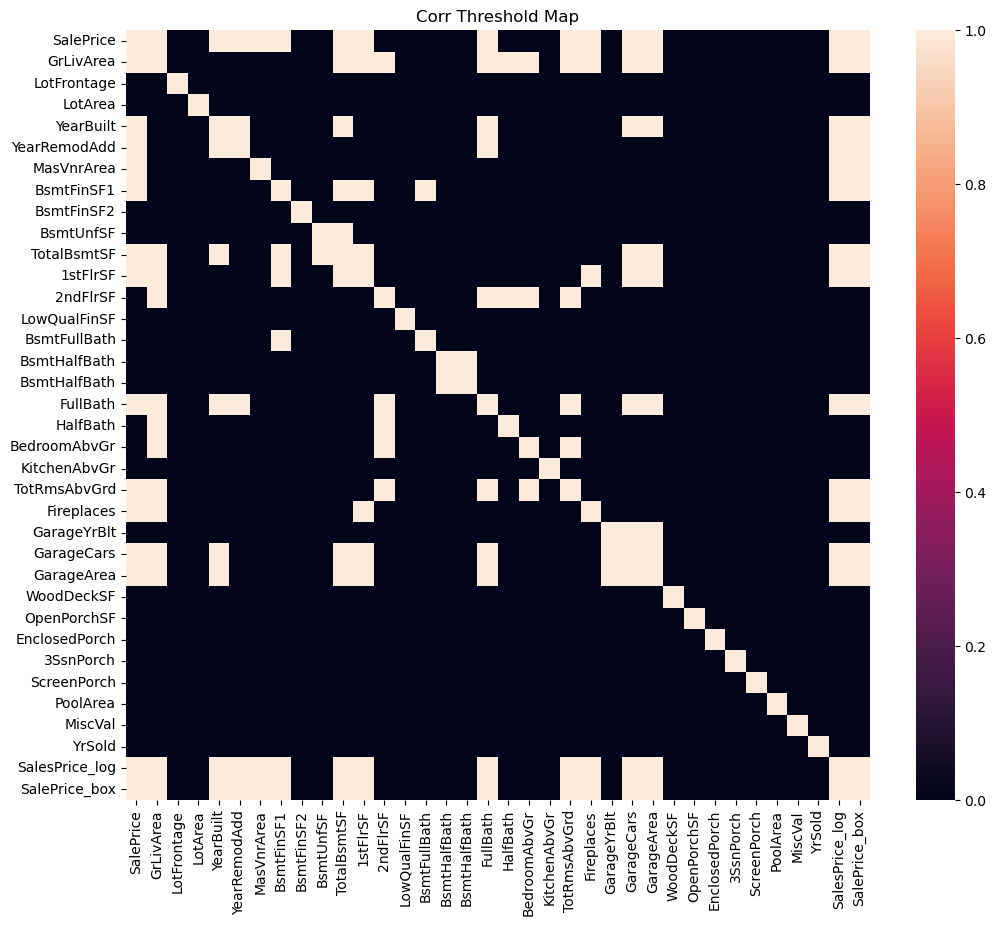

In [120]:
#Correlation Matric with threshhold

threshhold = .4

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix>threshhold))
plt.title('Corr Threshold Map')

<p><a name="sp_corr"></a></p>

#### Correlations of Features and Salesprice. 

SalePrice
SalePrice        1.000000
SalesPrice_log   0.951051
SalePrice_box    0.946373
GrLivArea        0.719803
TotalBsmtSF      0.652771
1stFlrSF         0.643106
GarageCars       0.639497
GarageArea       0.636343
YearBuilt        0.544185
FullBath         0.533333
YearRemodAdd     0.510881
MasVnrArea       0.498545
TotRmsAbvGrd     0.488849
Fireplaces       0.487173
BsmtFinSF1       0.459977
WoodDeckSF       0.332338
OpenPorchSF      0.313309
BsmtFullBath     0.287436

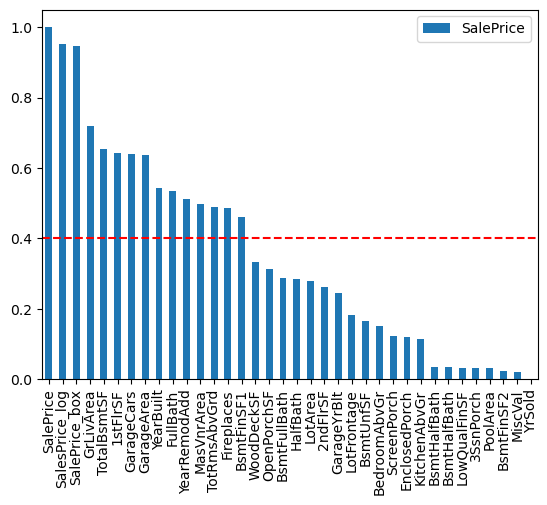

In [123]:
#Continuos variables Top 15 correlated features -- may go to feature importance. 

abs(corr_matrix[['SalePrice']]).sort_values(by = 'SalePrice', ascending = False).plot.bar()
plt.axhline(y=0.4, color='r', linestyle='--', label='y=0.5')
top_15 = abs(corr_matrix[['SalePrice']]).sort_values(by = 'SalePrice', ascending = False).head(18)
top_15
# Top 14 Cont Features in terms of correlation. 
# Overall Condition is not highly correlated to SalespPrice. 

<Axes: >

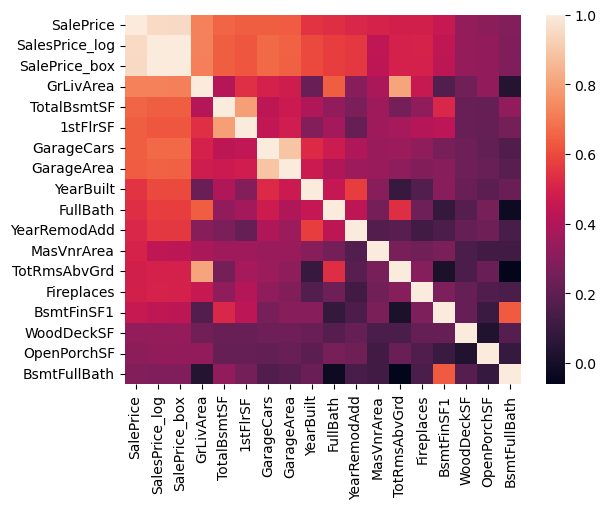

In [124]:
sns.heatmap(housing_d[top_15.index].corr())

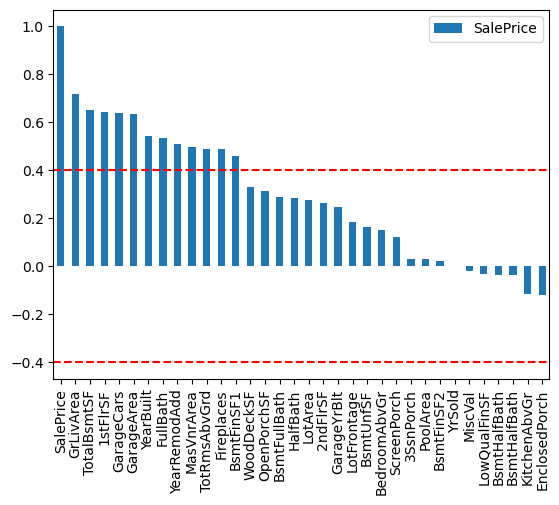

In [110]:
corr_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).plot.bar()
plt.axhline(y=0.4, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=-0.4, color='r', linestyle='--', label='y=0.5')

#No features that are negavtively correlated to SalePrice

In [125]:
# F statistics - The F-statistic and p-value indicate whether there are significant 
#differences in the means of the continuous variable across different categories.

from scipy.stats import pointbiserialr, f_oneway
housing_s = housing_d.copy()
test = []
for columns in categorical:
    housing_s[columns] = housing_d[columns].astype('category').cat.codes
    groups = [housing_s[housing_s[columns] == label]['SalePrice'] for label in housing_s[columns].unique()]
    anova_result = f_oneway(*groups)
    test.append([columns, anova_result.statistic,anova_result.pvalue])
cat_corr = pd.DataFrame(test, columns=['Feature','F_Statistic', 'P_Value'])
cat_corr.sort_values(by = 'P_Value')

Feature  F_Statistic        P_Value
32    KitchenQual   536.246989   0.000000e+00
23       BsmtQual   476.453472   0.000000e+00
20      ExterQual   796.063256   0.000000e+00
13    OverallQual   628.163620   0.000000e+00
8    Neighborhood   130.811820   0.000000e+00
35   GarageFinish   346.688045  7.302997e-189
22     Foundation   185.820459  4.134508e-169
34     GarageType   129.284281  3.731344e-143
26   BsmtFinType1   125.023875  6.650542e-139
0      MSSubClass    52.474665  8.707203e-137
29      HeatingQC   160.851491  6.395566e-123
25   BsmtExposure   142.800046  2.704178e-110
19     MasVnrType   174.064083  1.111144e-102
17    Exterior1st    33.235828   1.358374e-82
18    Exterior2nd    31.042150   6.470317e-82
14    OverallCond    54.334872   7.594416e-82
1        MSZoning    66.434319   2.103725e-65
3        LotShape    87.292790   9.009807e-54
36     GarageQual    47.544017   3.806785e-47
37     GarageCond    42.463566   3.826620e-42
43       SaleType    24.862952   2.623129e-41
38     PavedDrive    96.075572   5.873001e-41
44  SaleCondition    39.879540   1.385461e-39
30     CentralAir   171.720003   5.085068e-38
12     HouseStyle    27.829478   4.152773e-37
15      RoofStyle    32.069774   8.548417e-32
31     Electrical    48.379557   2.089771e-30
24       BsmtCond    26.265834   5.911518e-26
9      Condition1    15.360388   3.080254e-22
40          Fence    23.926292   1.866590e-19
4     LandContour    29.749053   6.694355e-19
11       BldgType    22.105531   5.821985e-18
27   BsmtFinType2    12.337926   9.753750e-14
10     Condition2     9.542768   9.446360e-12
6       LotConfig    13.994054   2.687440e-11
21      ExterCond    12.858937   2.292559e-10
16       RoofMatl     9.153563   6.179998e-10
39         PoolQC     7.678239   3.796341e-06
33     Functional     5.662869   7.420295e-06
7       LandSlope     8.902709   1.402838e-04
28        Heating     4.159339   9.130604e-04
41    MiscFeature     2.793719   2.487760e-02
2          Street     4.745197   2.947125e-02
42         MoSold     1.297974   2.187817e-01
5       Utilities     0.713924   3.982234e-01

In [130]:
for i in cat_corr.sort_values(by = 'P_Value').Feature:
    print(i)

KitchenQual
BsmtQual
ExterQual
OverallQual
Neighborhood
GarageFinish
Foundation
GarageType
BsmtFinType1
MSSubClass
HeatingQC
BsmtExposure
MasVnrType
Exterior1st
Exterior2nd
OverallCond
MSZoning
LotShape
GarageQual
GarageCond
SaleType
PavedDrive
SaleCondition
CentralAir
HouseStyle
RoofStyle
Electrical
BsmtCond
Condition1
Fence
LandContour
BldgType
BsmtFinType2
Condition2
LotConfig
ExterCond
RoofMatl
PoolQC
Functional
LandSlope
Heating
MiscFeature
Street
MoSold
Utilities


#### Feature v Dependent Plots

In [131]:
#Categorical Features: Boxplots by feature label v SalePrice

fig, axs = plt.subplots(len(categorical)*2, 1, figsize=(20, 400))
for num, column in enumerate(cat_corr.sort_values(by = 'P_Value').Feature):
    housing_d[[column,'SalePrice']].reset_index().groupby(column).boxplot(
        fontsize=12, column = 'SalePrice', subplots = False, ax = axs[num*2])
    axs[num*2].set_title(column)
    axs[num*2].grid(True)
    housing_d[[column,'SalesPrice_log']].reset_index().groupby(column).boxplot(
        fontsize=12, column = 'SalesPrice_log', subplots = False, ax = axs[num*2 + 1])
    axs[num*2 + 1].set_title(column + ' Log')
    axs[num*2 + 1].grid(True)
plt.show()

In [137]:
#Continous Variables

fig, axs = plt.subplots(2*len(abs(corr_matrix[['SalePrice']]).sort_values(
    by = 'SalePrice', ascending = False).drop(
    ['SalePrice','SalesPrice_log','SalePrice_box'], axis = 0).index), 1, figsize=(20, 450))
for num, column in enumerate(abs(corr_matrix[['SalePrice']]).sort_values(
    by = 'SalePrice', ascending = False).drop(
    ['SalePrice','SalesPrice_log','SalePrice_box'], axis = 0).index):
    housing_d[[column,'SalePrice']].plot.scatter(x=column, y = 'SalePrice', ax = axs[num*2])
    axs[num*2].set_title(column)
    axs[num*2].grid(True)
    housing_d[[column,'SalesPrice_log']].plot.scatter(x=column, y = 'SalesPrice_log', ax = axs[2*num+1])
    axs[2*num+1].set_title(column + ' Log')
    axs[2*num+1].grid(True)
plt.show()

In [81]:
# housing_d[['YearRemodAdd']].value_counts().reset_index().sort_values(by = 'YearRemodAdd', ascending = False)
housing_d[housing_d.YearRemodAdd == housing_d.YearBuilt].shape #(1386, 81)
housing_d[housing_d.YearRemodAdd == housing_d.YearBuilt][['YearBuilt']].value_counts().reset_index().sort_values(by = 'YearBuilt')

YearBuilt  count
30       1950     20
47       1951     11
48       1952     10
36       1953     18
25       1954     24
..        ...    ...
3        2006     54
4        2007     45
17       2008     29
56       2009      6
60       2010      2

[61 rows x 2 columns]

In [82]:
housing_d[~(housing_d.YearRemodAdd == housing_d.YearBuilt)].shape #(1194, 81)
housing_d[~(housing_d.YearRemodAdd == housing_d.YearBuilt)][['YearBuilt']].value_counts().reset_index().sort_values(by = 'YearBuilt')

YearBuilt  count
111       1872      1
100       1875      1
110       1879      1
73        1880      5
109       1882      1
..         ...    ...
1         2005     46
7         2006     26
18        2007     18
78        2008      4
87        2009      3

[112 rows x 2 columns]